##### **Dataset: SBA Loans Case**.
##### **Author : Amy Mickle**

Dataset ini merupakan dataset dari organisasi bernama **SBA(The Small Business Administration)** yang merupakann organisasi yang menaungi UMKM di Amerika Serikat. Tujuan dari organisasi ini dibentuk adalah untuk memudahkan UMKM di Amerika Serikat mendapatkan dana pinjaman dari bank.

<br>Informasi pada dataset ini:
<ul>
  <li>Pinjaman dana dari perusahaan Real Estate and Rental and Leasing industry di California.</li>
  <li>Terdiri dari 2012 baris data</li>
  <li>Terdapat 35 kolom</li>
</ul>
<br>Fokus dari dataset ini yaitu memberikan informasi apakah perusahan dapat mengembalikan dana pinjaman sepenuhnya atau malah perusahan tersebut bangkrut dan SBA harus menanggung biaya pengembaliannya ke bank.

Source: 	
[Kaggle](https://www.kaggle.com/datasets/larsen0966/sba-loans-case-data-set?resource=download)
 | [Complete Data](https://amstat.tandfonline.com/doi/full/10.1080/10691898.2018.1434342)


 ## Tujuan Projek

 Tujuan dari projek ini adalah untuk memprediksi apakah perusahaan akan mengembalikan dana pinjaman sepenuhnya atau tidak. Dengan memprediksi apakah perusahaan tersebut akan mengembalikan dana pinjaman sepenuhnya atau tidak, maka SBA dapat menentukan apakah perusahaan tersebut layak untuk mendapatkan pinjaman atau tidak. Dengan demikian, SBA dapat mengurangi risiko kebangkrutan perusahaan yang meminjam dana dari bank.


 1. Exploratory Data Analysis, Hal ini bertujuan untuk mengetahui karakteristik dari dataset
 2. Data Preprocessing, Hal ini bertujuan untuk mempersiapkan dataset untuk diproses oleh model 
 3. Feature Engineering, Hal ini bertujuan untuk menambahkan fitur baru yang dapat meningkatkan performa model
 4. Feature Selection, Hal ini bertujuan untuk memilih fitur yang akan digunakan untuk membangun model
  5. Model Building, Hal ini bertujuan untuk membangun model yang dapat memprediksi apakah perusahaan akan mengembalikan dana pinjaman sepenuhnya atau tidak dengan menggunakan logistic regression
  6. Model Evaluation, Hal ini bertujuan untuk mengevaluasi performa model yang telah dibangun

  Berikut ini uraian yang harus dilakukan pada projek ini:

  1. Mempersiapkan dataset
     - Import Library
     - Exploratory Data Analysis
    
      - Feature Engineering
      - Feature Selection
  2. Membangun model
     - Logistic Regression
         - Baseline
         - Iterate
         - Evaluate


  Deskripsi dataset:
  1. Selected : Column number
2. LoanNr_ChkDgt : Identifier - Primary Key
3. Name : Borrower name
4. City : Borrower City
5. State : Borrower State
6. Zip : Borrower ZIP Code
7. Bank : Bank name
8. BankState : Bank State
9. NAICS : North American industry classification system code
10. ApprovalDate : Date SBA commitment issued
11. ApprovalFY : Fiscal year of commitment
12. Term : Loan term in months
13. NoEmp : Number of Business Employees
14. NewExist : 1 = Existing business, 2 = New business
15. CreateJob : Number of Jobs Created
16. RetainedJob : Number of jobs retained
17. FranchiseCode : Franchise code, (00000 or 00001) = No franchise
18. UrbanRural : 1 = Urban, 2 = rural, 0 = undefined
19. RevLineCr : Revolving line of credit: Y = Yes, N = No
20. LowDoc : LowDoc Loan Program: Y = Yes, N = No
21. ChgOffDate : The date when a loan is declared to be in default
22. DisbursementDate : Disbursement date
23. DisbursementGross : Amount disbursed
24. BalanceGross : Gross amount outstanding
25. MIS_Status : Loan status charged off = CHGOFF, Paid in full = PIF
26. ChgOffPrinGr : Charged-off amount
27. GrAppv : Gross amount of loan approved by bank
28. SBA_Appv : SBA's guaranteed amount of approved loan
29. New : New or Existing Loan
30. RealEstate : Was Real Estate Used as Collateral
31. Portion : What Portion of the Loan was Guaranteed by the SBA
32. Recession : Was this loan made during a Recession
33. daysterm : How many Days were in the Loan Terms
34. xx : Amount of Default if Any
35. Default : Did the Loan Default
  

# ======================== MEMPERSIAPKAN DATASET ===============================

# Import Library 

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Memuat Datasets

##  Membaca Datasets

In [95]:
df = pd.read_csv('data/SBAcase.11.13.17.csv')

df

,Selected,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,...,ChgOffPrinGr,GrAppv,SBA_Appv,New,RealEstate,Portion,Recession,daysterm,xx,Default
0,0,1004285007,SIMPLEX OFFICE SOLUTIONS,ANAHEIM,CA,92801,CALIFORNIA BANK & TRUST,CA,532420,15074,...,0,30000,15000,0,0,0.50,0,1080,16175.0,0
1,1,1004535010,DREAM HOME REALTY,TORRANCE,CA,90505,CALIFORNIA BANK & TRUST,CA,531210,15130,...,0,30000,15000,0,0,0.50,1,1680,17658.0,0
2,0,1005005006,"Winset, Inc. dba Bankers Hill",SAN DIEGO,CA,92103,CALIFORNIA BANK & TRUST,CA,531210,15188,...,0,30000,15000,0,0,0.50,0,1080,16298.0,0
3,1,1005535001,Shiva Management,SAN DIEGO,CA,92108,CALIFORNIA BANK & TRUST,CA,531312,15719,...,0,50000,25000,0,0,0.50,0,1080,16816.0,0
4,1,1005996006,"GOLD CROWN HOME LOANS, INC",LOS ANGELES,CA,91345,SBA - EDF ENFORCEMENT ACTION,CO,531390,16840,...,0,343000,343000,0,1,1.00,0,7200,24103.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097,1,9893874006,MEGA VIDEO & WIRELESS HIGHLAND,HIGHLAND,CA,92346,UNITI BANK,CA,532230,16838,...,0,150000,75000,1,0,0.50,0,1800,18691.0,0
2098,1,9901143004,MOVING CONNECTION & CARL'S TRA,EL CAJON,CA,92021,ZIONS FIRST NATIONAL BANK,UT,532120,13530,...,0,99000,79200,0,1,0.80,0,9000,22545.0,0
2099,0,9903293007,"A.J. STUDIO RENTALS, INC.",CAMARILLO,CA,93012,CITY NATIONAL BANK,CA,532120,13531,...,0,50000,40000,0,0,0.80,0,2520,16124.0,0
2100,1,9925643006,TAHOE MOTION PICTURE RENTALS,SUN VALLEY,CA,91352,CITY NATIONAL BANK,CA,532120,13542,...,0,500000,375000,0,0,0.75,0,3600,17265.0,0


<p> Menampilkan 5 data teratas </p>

In [96]:
df.head()

,Selected,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,...,ChgOffPrinGr,GrAppv,SBA_Appv,New,RealEstate,Portion,Recession,daysterm,xx,Default
0,0,1004285007,SIMPLEX OFFICE SOLUTIONS,ANAHEIM,CA,92801,CALIFORNIA BANK & TRUST,CA,532420,15074,...,0,30000,15000,0,0,0.5,0,1080,16175.0,0
1,1,1004535010,DREAM HOME REALTY,TORRANCE,CA,90505,CALIFORNIA BANK & TRUST,CA,531210,15130,...,0,30000,15000,0,0,0.5,1,1680,17658.0,0
2,0,1005005006,"Winset, Inc. dba Bankers Hill",SAN DIEGO,CA,92103,CALIFORNIA BANK & TRUST,CA,531210,15188,...,0,30000,15000,0,0,0.5,0,1080,16298.0,0
3,1,1005535001,Shiva Management,SAN DIEGO,CA,92108,CALIFORNIA BANK & TRUST,CA,531312,15719,...,0,50000,25000,0,0,0.5,0,1080,16816.0,0
4,1,1005996006,"GOLD CROWN HOME LOANS, INC",LOS ANGELES,CA,91345,SBA - EDF ENFORCEMENT ACTION,CO,531390,16840,...,0,343000,343000,0,1,1.0,0,7200,24103.0,0


## Exploratory Data Analysisis

<p> hal ini bertujuan untuk melihat tipe data pada setiap fitur yang ada pada datasets </p>

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2102 entries, 0 to 2101
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Selected           2102 non-null   int64  
 1   LoanNr_ChkDgt      2102 non-null   int64  
 2   Name               2102 non-null   object 
 3   City               2102 non-null   object 
 4   State              2102 non-null   object 
 5   Zip                2102 non-null   int64  
 6   Bank               2099 non-null   object 
 7   BankState          2099 non-null   object 
 8   NAICS              2102 non-null   int64  
 9   ApprovalDate       2102 non-null   int64  
 10  ApprovalFY         2102 non-null   int64  
 11  Term               2102 non-null   int64  
 12  NoEmp              2102 non-null   int64  
 13  NewExist           2101 non-null   float64
 14  CreateJob          2102 non-null   int64  
 15  RetainedJob        2102 non-null   int64  
 16  FranchiseCode      2102 

## Menampilkan nilai dari statistik deskriptif

In [98]:
df.describe()

,Selected,LoanNr_ChkDgt,Zip,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,...,ChgOffPrinGr,GrAppv,SBA_Appv,New,RealEstate,Portion,Recession,daysterm,xx,Default
count,2102.000000,2.102000e+03,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2101.000000,2102.000000,...,2.102000e+03,2.102000e+03,2.102000e+03,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2099.000000,2102.000000
mean,0.500000,4.469172e+09,92698.612274,531630.902950,16179.587060,2004.035680,126.980495,10.150809,1.153736,2.549952,...,2.002908e+04,2.330641e+05,1.891759e+05,0.154139,0.274500,0.671055,0.068506,3809.414843,20076.896141,0.326356
std,0.500119,2.530069e+09,1878.208435,521.836986,1454.931276,4.006321,93.798944,34.402420,0.362099,8.010175,...,7.543229e+04,3.436310e+05,2.989268e+05,0.361168,0.446368,0.186519,0.252673,2813.968318,2854.510377,0.468991
min,0.000000,1.004285e+09,65757.000000,531110.000000,10554.000000,1989.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,4.500000e+03,2.250000e+03,0.000000,0.000000,0.296770,0.000000,0.000000,11524.000000,0.000000
25%,0.000000,2.392978e+09,91402.000000,531210.000000,15695.750000,2003.000000,60.000000,2.000000,1.000000,0.000000,...,0.000000e+00,3.000000e+04,1.500000e+04,0.000000,0.000000,0.500000,0.000000,1800.000000,18316.500000,0.000000
50%,0.500000,3.621730e+09,92559.500000,531312.000000,16556.000000,2005.000000,84.000000,3.000000,1.000000,0.000000,...,0.000000e+00,6.100000e+04,4.168000e+04,0.000000,0.000000,0.500000,0.000000,2520.000000,19270.000000,0.000000
75%,1.000000,6.551607e+09,94127.750000,532230.000000,17149.750000,2007.000000,240.000000,8.000000,1.000000,2.000000,...,1.507350e+04,3.000000e+05,2.397562e+05,0.000000,1.000000,0.850000,0.000000,7200.000000,22335.000000,1.000000
max,1.000000,9.958873e+09,96161.000000,533110.000000,18911.000000,2012.000000,306.000000,650.000000,2.000000,130.000000,...,1.509550e+06,2.350000e+06,2.115000e+06,1.000000,1.000000,1.000000,1.000000,9180.000000,27598.000000,1.000000


In [99]:
# Memeriksa apakah ada data yang missing
df.isnull().sum()

Selected                0
LoanNr_ChkDgt           0
Name                    0
City                    0
State                   0
Zip                     0
Bank                    3
BankState               3
NAICS                   0
ApprovalDate            0
ApprovalFY              0
Term                    0
NoEmp                   0
NewExist                1
CreateJob               0
RetainedJob             0
FranchiseCode           0
UrbanRural              0
RevLineCr               2
LowDoc                  3
ChgOffDate           1405
DisbursementDate        3
DisbursementGross       0
BalanceGross            0
MIS_Status              0
ChgOffPrinGr            0
GrAppv                  0
SBA_Appv                0
New                     0
RealEstate              0
Portion                 0
Recession               0
daysterm                0
xx                      3
Default                 0
dtype: int64

Dapat dilihat bahwa diatas ada beberapa kolom yang datanya terdapat missing value, Oleh karena itu, Untuk memudahkan dalam proses analisis, maka akan dibuat suatu list untuk menampung kolom yang datanya terdapat missing value.

In [100]:
# Membuat list untuk menampung nama kolom yang datanya terdapat missing value
missing_values = []

# Membuat kondisi jika suatu kolom memiliki missing value maka akan ditambahkan ke dalam list
for col in df.columns:
    if df[col].isnull().sum() > 0:
        missing_values.append(col)

# Menampilkan nama kolom yang memiliki missing value
missing_values

['Bank',
 'BankState',
 'NewExist',
 'RevLineCr',
 'LowDoc',
 'ChgOffDate',
 'DisbursementDate',
 'xx']

In [101]:
# Menampilkan informasi kolom yang memiliki missing value
df[missing_values].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2102 entries, 0 to 2101
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Bank              2099 non-null   object 
 1   BankState         2099 non-null   object 
 2   NewExist          2101 non-null   float64
 3   RevLineCr         2100 non-null   object 
 4   LowDoc            2099 non-null   object 
 5   ChgOffDate        697 non-null    float64
 6   DisbursementDate  2099 non-null   float64
 7   xx                2099 non-null   float64
dtypes: float64(4), object(4)
memory usage: 131.5+ KB


In [102]:
# Menghitung jumlah missing value pada kolom yang memiliki missing value
df[missing_values].isnull().sum()

Bank                   3
BankState              3
NewExist               1
RevLineCr              2
LowDoc                 3
ChgOffDate          1405
DisbursementDate       3
xx                     3
dtype: int64

In [103]:
# Membuat list untuk menampung nama kolom yang datanya terdapat missing value dan tipe datanya adalah object
missing_values_object = []

# Membuat list untuk menampung nama kolom yang datanya terdapat missing value dan tipe datanya adalah float
missing_values_float = []

# Membuat kondisi jika suatu kolom memiliki missing value dan tipe datanya adalah object maka akan ditambahkan ke dalam list
for col in df.columns:
    if df[col].isnull().sum() > 0 and df[col].dtype == 'object':
        missing_values_object.append(col)

# Membuat kondisi jika suatu kolom memiliki missing value dan tipe datanya adalah float maka akan ditambahkan ke dalam list
for col in df.columns:
    if df[col].isnull().sum() > 0 and df[col].dtype == 'float64':
        missing_values_float.append(col)

# Menampilkan nama kolom yang memiliki missing value dan tipe datanya adalah object
print(missing_values_object)

# Menampilkan nama kolom yang memiliki missing value dan tipe datanya adalah float
print(missing_values_float)


['Bank', 'BankState', 'RevLineCr', 'LowDoc']
['NewExist', 'ChgOffDate', 'DisbursementDate', 'xx']


In [104]:
# Melihat jumlah missing value pada kolom yang memiliki missing value dan tipe datanya adalah object
df[missing_values_object].isnull().sum()

Bank         3
BankState    3
RevLineCr    2
LowDoc       3
dtype: int64

# Feature Engineering

dapat dilihat bahwa kolom yang bertipe data object hanya memiliki sedikit missing value, oleh karena itu, missing value pada kolom tersebut akan dihapus saja karena data yang sedikit tidak akan terlalu mempengaruhi hasil analisis.

In [105]:
# Menghapus missing value pada kolom yang memiliki missing value dan tipe datanya adalah object
df.dropna(subset=missing_values_object, inplace=True)

In [106]:
df

,Selected,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,...,ChgOffPrinGr,GrAppv,SBA_Appv,New,RealEstate,Portion,Recession,daysterm,xx,Default
0,0,1004285007,SIMPLEX OFFICE SOLUTIONS,ANAHEIM,CA,92801,CALIFORNIA BANK & TRUST,CA,532420,15074,...,0,30000,15000,0,0,0.50,0,1080,16175.0,0
1,1,1004535010,DREAM HOME REALTY,TORRANCE,CA,90505,CALIFORNIA BANK & TRUST,CA,531210,15130,...,0,30000,15000,0,0,0.50,1,1680,17658.0,0
2,0,1005005006,"Winset, Inc. dba Bankers Hill",SAN DIEGO,CA,92103,CALIFORNIA BANK & TRUST,CA,531210,15188,...,0,30000,15000,0,0,0.50,0,1080,16298.0,0
3,1,1005535001,Shiva Management,SAN DIEGO,CA,92108,CALIFORNIA BANK & TRUST,CA,531312,15719,...,0,50000,25000,0,0,0.50,0,1080,16816.0,0
4,1,1005996006,"GOLD CROWN HOME LOANS, INC",LOS ANGELES,CA,91345,SBA - EDF ENFORCEMENT ACTION,CO,531390,16840,...,0,343000,343000,0,1,1.00,0,7200,24103.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097,1,9893874006,MEGA VIDEO & WIRELESS HIGHLAND,HIGHLAND,CA,92346,UNITI BANK,CA,532230,16838,...,0,150000,75000,1,0,0.50,0,1800,18691.0,0
2098,1,9901143004,MOVING CONNECTION & CARL'S TRA,EL CAJON,CA,92021,ZIONS FIRST NATIONAL BANK,UT,532120,13530,...,0,99000,79200,0,1,0.80,0,9000,22545.0,0
2099,0,9903293007,"A.J. STUDIO RENTALS, INC.",CAMARILLO,CA,93012,CITY NATIONAL BANK,CA,532120,13531,...,0,50000,40000,0,0,0.80,0,2520,16124.0,0
2100,1,9925643006,TAHOE MOTION PICTURE RENTALS,SUN VALLEY,CA,91352,CITY NATIONAL BANK,CA,532120,13542,...,0,500000,375000,0,0,0.75,0,3600,17265.0,0


In [107]:
# Melihat jumlah missing value pada kolom yang memiliki missing value dan tipe datanya adalah float64
df[missing_values_float].isnull().sum()


NewExist               1
ChgOffDate          1399
DisbursementDate       3
xx                     3
dtype: int64

Diatas dapat dilihat bahwa kolom yang bertipe float64 memiliki banyak missing value, oleh karena itu, missing value pada kolom tersebut akan diisi dengan nilai mean dari kolom tersebut.

In [108]:
# Karena jumlah missing value pada kolom yang memiliki missing value dan tipe datanya adalah float64 sangat banyak, maka kita akan menggunakan teknik mean untuk mengisi missing value tersebut
for col in missing_values_float:
    df[col].fillna(df[col].mean(), inplace=True)

df

,Selected,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,...,ChgOffPrinGr,GrAppv,SBA_Appv,New,RealEstate,Portion,Recession,daysterm,xx,Default
0,0,1004285007,SIMPLEX OFFICE SOLUTIONS,ANAHEIM,CA,92801,CALIFORNIA BANK & TRUST,CA,532420,15074,...,0,30000,15000,0,0,0.50,0,1080,16175.000000,0
1,1,1004535010,DREAM HOME REALTY,TORRANCE,CA,90505,CALIFORNIA BANK & TRUST,CA,531210,15130,...,0,30000,15000,0,0,0.50,1,1680,17658.000000,0
2,0,1005005006,"Winset, Inc. dba Bankers Hill",SAN DIEGO,CA,92103,CALIFORNIA BANK & TRUST,CA,531210,15188,...,0,30000,15000,0,0,0.50,0,1080,16298.000000,0
3,1,1005535001,Shiva Management,SAN DIEGO,CA,92108,CALIFORNIA BANK & TRUST,CA,531312,15719,...,0,50000,25000,0,0,0.50,0,1080,16816.000000,0
4,1,1005996006,"GOLD CROWN HOME LOANS, INC",LOS ANGELES,CA,91345,SBA - EDF ENFORCEMENT ACTION,CO,531390,16840,...,0,343000,343000,0,1,1.00,0,7200,24103.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097,1,9893874006,MEGA VIDEO & WIRELESS HIGHLAND,HIGHLAND,CA,92346,UNITI BANK,CA,532230,16838,...,0,150000,75000,1,0,0.50,0,1800,18691.000000,0
2098,1,9901143004,MOVING CONNECTION & CARL'S TRA,EL CAJON,CA,92021,ZIONS FIRST NATIONAL BANK,UT,532120,13530,...,0,99000,79200,0,1,0.80,0,9000,22545.000000,0
2099,0,9903293007,"A.J. STUDIO RENTALS, INC.",CAMARILLO,CA,93012,CITY NATIONAL BANK,CA,532120,13531,...,0,50000,40000,0,0,0.80,0,2520,16124.000000,0
2100,1,9925643006,TAHOE MOTION PICTURE RENTALS,SUN VALLEY,CA,91352,CITY NATIONAL BANK,CA,532120,13542,...,0,500000,375000,0,0,0.75,0,3600,17265.000000,0


In [109]:
# Terakhir mengecek apakah masih ada missing value
df.isnull().sum()

Selected             0
LoanNr_ChkDgt        0
Name                 0
City                 0
State                0
Zip                  0
Bank                 0
BankState            0
NAICS                0
ApprovalDate         0
ApprovalFY           0
Term                 0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
RevLineCr            0
LowDoc               0
ChgOffDate           0
DisbursementDate     0
DisbursementGross    0
BalanceGross         0
MIS_Status           0
ChgOffPrinGr         0
GrAppv               0
SBA_Appv             0
New                  0
RealEstate           0
Portion              0
Recession            0
daysterm             0
xx                   0
Default              0
dtype: int64

Menampilkan semua kolom yang ada pada dataset

In [110]:
# list all columns
df.columns

Index(['Selected', 'LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank',
       'BankState', 'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp',
       'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural',
       'RevLineCr', 'LowDoc', 'ChgOffDate', 'DisbursementDate',
       'DisbursementGross', 'BalanceGross', 'MIS_Status', 'ChgOffPrinGr',
       'GrAppv', 'SBA_Appv', 'New', 'RealEstate', 'Portion', 'Recession',
       'daysterm', 'xx', 'Default'],
      dtype='object')

## Melakukan label encoding pada kolom RevLineCr, LowDOc, MIS_Status



In [111]:
from sklearn import preprocessing

def label_encoder(y):
    le = preprocessing.LabelEncoder()
    le.fit(y)
    return le.transform(y)

list_variabel_encoder = ['RevLineCr', 'LowDoc', 'MIS_Status']

for i in list_variabel_encoder:
    df[i] = label_encoder(df[i])

df

,Selected,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,...,ChgOffPrinGr,GrAppv,SBA_Appv,New,RealEstate,Portion,Recession,daysterm,xx,Default
0,0,1004285007,SIMPLEX OFFICE SOLUTIONS,ANAHEIM,CA,92801,CALIFORNIA BANK & TRUST,CA,532420,15074,...,0,30000,15000,0,0,0.50,0,1080,16175.000000,0
1,1,1004535010,DREAM HOME REALTY,TORRANCE,CA,90505,CALIFORNIA BANK & TRUST,CA,531210,15130,...,0,30000,15000,0,0,0.50,1,1680,17658.000000,0
2,0,1005005006,"Winset, Inc. dba Bankers Hill",SAN DIEGO,CA,92103,CALIFORNIA BANK & TRUST,CA,531210,15188,...,0,30000,15000,0,0,0.50,0,1080,16298.000000,0
3,1,1005535001,Shiva Management,SAN DIEGO,CA,92108,CALIFORNIA BANK & TRUST,CA,531312,15719,...,0,50000,25000,0,0,0.50,0,1080,16816.000000,0
4,1,1005996006,"GOLD CROWN HOME LOANS, INC",LOS ANGELES,CA,91345,SBA - EDF ENFORCEMENT ACTION,CO,531390,16840,...,0,343000,343000,0,1,1.00,0,7200,24103.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097,1,9893874006,MEGA VIDEO & WIRELESS HIGHLAND,HIGHLAND,CA,92346,UNITI BANK,CA,532230,16838,...,0,150000,75000,1,0,0.50,0,1800,18691.000000,0
2098,1,9901143004,MOVING CONNECTION & CARL'S TRA,EL CAJON,CA,92021,ZIONS FIRST NATIONAL BANK,UT,532120,13530,...,0,99000,79200,0,1,0.80,0,9000,22545.000000,0
2099,0,9903293007,"A.J. STUDIO RENTALS, INC.",CAMARILLO,CA,93012,CITY NATIONAL BANK,CA,532120,13531,...,0,50000,40000,0,0,0.80,0,2520,16124.000000,0
2100,1,9925643006,TAHOE MOTION PICTURE RENTALS,SUN VALLEY,CA,91352,CITY NATIONAL BANK,CA,532120,13542,...,0,500000,375000,0,0,0.75,0,3600,17265.000000,0


## Feature Selection

In [112]:
# # Menghapus kolom yang tidak diperlukan

# df = df.drop(['Selected', 'Name', 'City', 'State', 'Bank', 'BankState', 'ApprovalDate', 'ApprovalFY', 'ChgOffDate', 'DisbursementDate', 'LoanNr_ChkDgt',  ], axis=1)

# Memisahkan antara fitur dan target

In [113]:
# Split data training dan data testing
from sklearn.model_selection import train_test_split


features = ['Term', 'Portion', 'daysterm' , 'DisbursementGross', 'BalanceGross', 'SBA_Appv', 'xx']
X = df[features]
y = df['Default'] # Labels



# Mengatasi overfitting sebelum membuat model

In [114]:
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(sampling_strategy=0.5)

X, y = oversampler.fit_resample(X, y)

## ==================================== Membangun Model =====================================

# Membagi dataset menjadi train dan test

In [115]:
# membagi data menjadi data training dan data testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape", y_test.shape)


X_train shape: (1690, 7)
y_train shape: (1690,)
X_test shape: (423, 7)
y_test shape (423,)


In [116]:
# Melakukan normalisasasi variabel yang continuous
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))


scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [117]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2)

X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

# Karena kita akan menggunakan Logistic Regression, maka kita akan menggunakan pemodelan sebagai berikut:
1. Baseline Model, ini bertujuan untuk mengetahui performa model sebelum dilakukan tuning parameter

2. Iterate Model, ini bertujuan untuk melakukan tuning parameter pada model

Lalu disini akan dibuat list dan dictionary untuk menampung hasil dari model yang telah dibuat

In [118]:
model_logistic_regression = []
accuracy = []
precision = []
recall = []
f1 = []
mse = []
rmse = []
roc = []

result_logistic_regression = {
    "Model Logistic Regression": model_logistic_regression,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1": f1,
    "mse" : mse,
    "rmse" : rmse,
    "roc" : roc
}

## Baseline

In [119]:
# menggunakan base model Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train_res, y_train_res)

y_pred = logreg.predict(X_test)


In [120]:
# Menghitung akurasi, precision, recall, dan f1 score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model_logistic_regression.append("Baseline Model")
accuracy.append(accuracy_score(y_test, y_pred))
precision.append(precision_score(y_test, y_pred))
recall.append(recall_score(y_test, y_pred))
f1.append(f1_score(y_test, y_pred))


## Evaluasi pada Baseline Model 



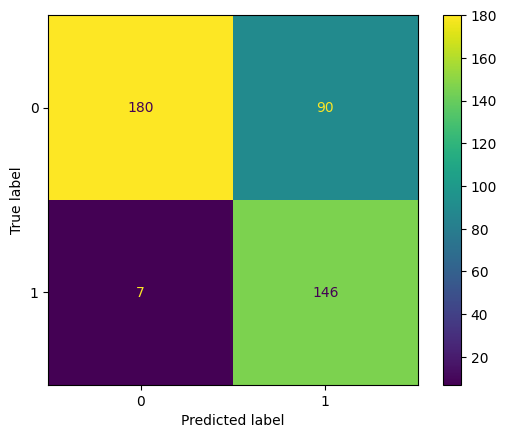

In [121]:
# Menampilkan confustion matrix
import matplotlib.pyplot as plt
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_, )

disp.plot()
plt.show()

## Classification Report pada baseline model


In [122]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.67      0.79       270
           1       0.62      0.95      0.75       153

    accuracy                           0.77       423
   macro avg       0.79      0.81      0.77       423
weighted avg       0.84      0.77      0.77       423



# ROC curve pada baseline model

ROC AUC score:  0.8104575163398694


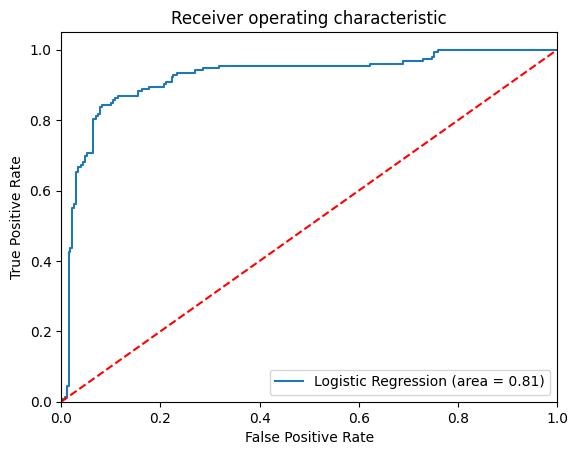

In [123]:
# ROC AUC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

print('ROC AUC score: ', roc_auc_score(y_test, y_pred))
roc.append(roc_auc_score(y_test, y_pred))

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [124]:
# Menghitung MSE dan RMSE
from sklearn.metrics import mean_squared_error

mse.append(mean_squared_error(y_test, y_pred))

rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))

print("MSE: ", mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))

MSE:  0.2293144208037825
RMSE:  0.4788678531743204


## Menampilkan hasil dalam bentuk dataframe pada baseline model


In [125]:
# Menampilkan hasil dalam bentuk dataframe

# show the result in table
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# reset index
result = result.reset_index(drop=True)

# Menyimpan hasil prediksi ke dalam file csv
result.to_csv('data/result_loanDefaultPredictionBeforeHyperParameterTuning.csv', index=False)

result


,Actual,Predicted
0,1,1
1,0,0
2,1,1
3,0,0
4,0,1
...,...,...
418,0,0
419,0,1
420,1,1
421,1,1


## Iterate

In [126]:
# create pipeline model
from sklearn.pipeline import Pipeline, make_pipeline
from category_encoders import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

model = make_pipeline(
    (OneHotEncoder(use_cat_names=True)),
    (StandardScaler()),
    (LogisticRegression(random_state=42)),
    
)

# fit the model to training data
model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder(cols=[], use_cat_names=True)),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=42))])

## Evaluasi Pada pipeline model

In [127]:
# calculate training and test accuracy scores
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_train, model.predict(X_train))
acc_test = accuracy_score(y_test, model.predict(X_test))

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 0.8651
Test Accuracy: 0.896


In [128]:
y_pred = model.predict(X_test)

# Menampilkan confusion matrix dan classification report

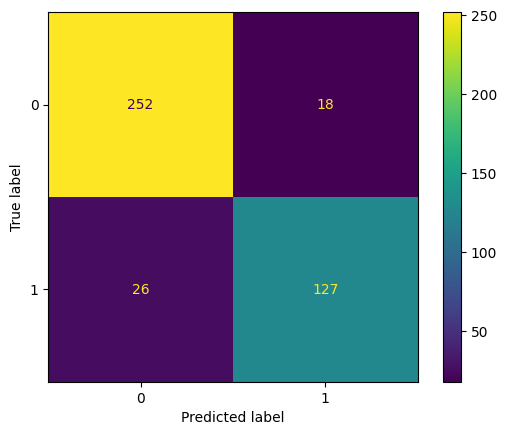

In [129]:
# Menampilkan confustion matrix
import matplotlib.pyplot as plt
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_, )

disp.plot()
plt.show()

In [130]:
# Menampilkan classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       270
           1       0.88      0.83      0.85       153

    accuracy                           0.90       423
   macro avg       0.89      0.88      0.89       423
weighted avg       0.90      0.90      0.90       423



In [131]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy: ', round(accuracy_score(y_test, y_pred), 4))
print('Precision: ', round(precision_score(y_test, y_pred), 4))
print('Recall: ', round(recall_score(y_test, y_pred), 4))
print('F1: ', round(f1_score(y_test, y_pred), 4))

# Menambahkan hasil evaluasi model ke dalam dictionary
model_logistic_regression.append('iterate model')
accuracy.append(round(accuracy_score(y_test, y_pred), 4))
precision.append(round(precision_score(y_test, y_pred), 4))
recall.append(round(recall_score(y_test, y_pred), 4))
f1.append(round(f1_score(y_test, y_pred), 4))



Accuracy:  0.896
Precision:  0.8759
Recall:  0.8301
F1:  0.8523


# ROC CURVE Setelah dilakukan tuning parameter

In [132]:
# Menampilkan ROC AUC
from sklearn.metrics import roc_auc_score

pred_auc = model.predict_proba(X_test)[:,1]
acc = roc_auc_score(y_test, pred_auc)
roc.append(acc)
print('ROC AUC: %.3f' % acc)

ROC AUC: 0.914


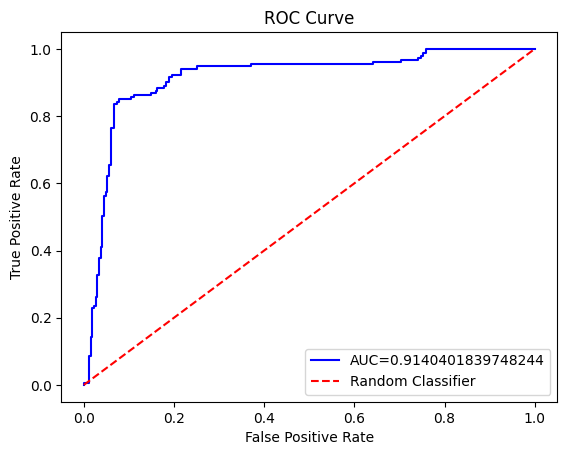

In [133]:
# Visualisasi ROC AUC
from sklearn.metrics import plot_roc_curve, auc, roc_curve

prob_estimates = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, prob_estimates[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,'b', label=f'AUC={roc_auc}')
plt.plot([0,1],[0,1],'r--', label='Random Classifier')

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Menghitung MSE (Mean Square Error) dan RMSE (Root Mean Square Error)

In [134]:
# Menghitung MSE
from sklearn.metrics import mean_squared_error


mse.append(mean_squared_error(y_test, y_pred))

rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


print("MSE: ", mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))



MSE:  0.10401891252955082
RMSE:  0.3225196312312645


# Menampilkan Hasil ke dalam bentuk dataframe untuk model yang sudah dilakukan tuning parameter

In [135]:
# show the result in table
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# reset index
result = result.reset_index(drop=True)

# Menyimpan hasil prediksi ke dalam file csv
result.to_csv('data/result_loanDefaultPredictionAfterHyperParameterTuning.csv', index=False)

result


,Actual,Predicted
0,1,1
1,0,0
2,1,1
3,0,0
4,0,1
...,...,...
418,0,0
419,0,0
420,1,1
421,1,1


# Kesimpulan

Pada kesimpulan dibawah dapat dilihat bahwa hasil yang dilakukan setelah melakukan tuning parameter pada model, maka dapat dilihat bahwa performa model yang sudah dilakukan tuning parameter lebih baik dibandingkan dengan model yang belum dilakukan tuning parameter. Hal ini dapat dilihat dari nilai accuracy, precision, recall, dan f1 score yang lebih baik pada model yang sudah dilakukan tuning parameter.

In [136]:
df_result = pd.DataFrame(result_logistic_regression)

df_result

,Model Logistic Regression,Accuracy,Precision,Recall,F1,mse,rmse,roc
0,Baseline Model,0.770686,0.618644,0.954248,0.750643,0.229314,0.478868,0.810458
1,iterate model,0.896000,0.875900,0.830100,0.852300,0.104019,0.322520,0.914040


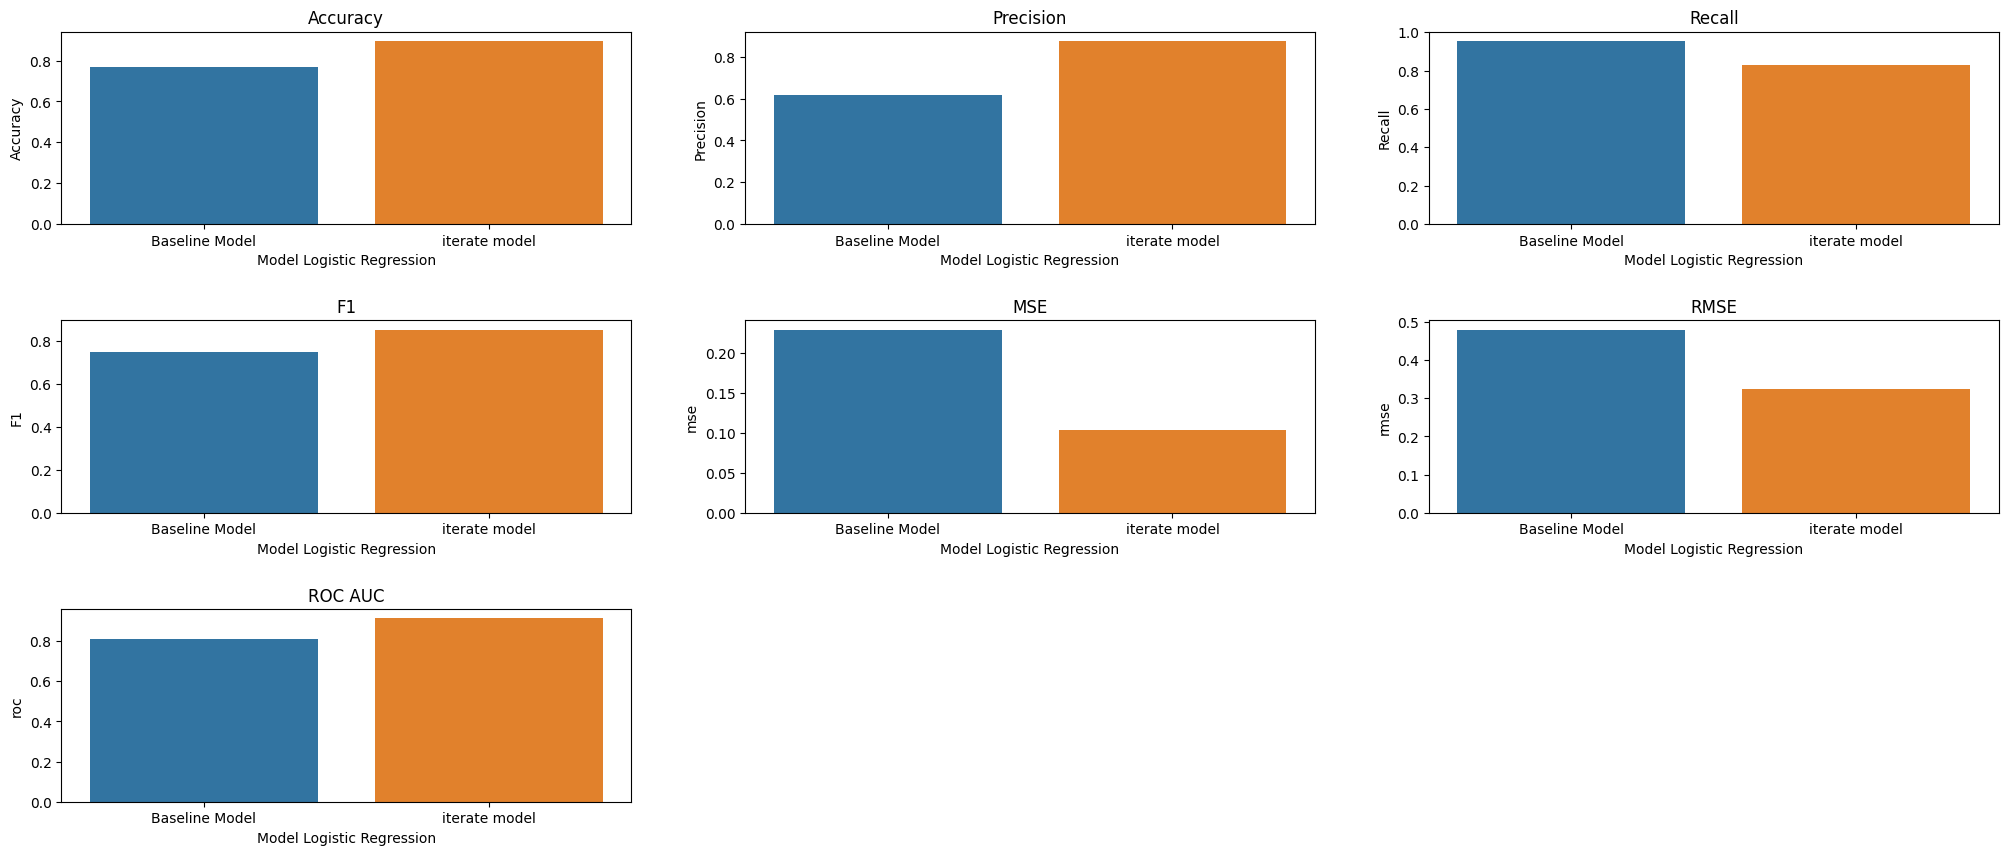

In [155]:
# Memvisualisasikan hasil evaluasi model
import matplotlib.pyplot as plt
import seaborn as sns

# visuasliasi hasil dengan membandingkan nilai akurasi, precision, recall, f1, dan mse dari baseline model dan model yang telah di tuning 
plt.figure(figsize=(25, 10))
plt.subplot(3 , 3, 1)
sns.barplot(x='Model Logistic Regression', y='Accuracy', data=df_result)
plt.title('Accuracy')

plt.subplot(3, 3, 2)
sns.barplot(x='Model Logistic Regression', y='Precision', data=df_result)
plt.title('Precision')

plt.subplot(3, 3, 3)
sns.barplot(x='Model Logistic Regression', y='Recall', data=df_result)
plt.title('Recall')

# give space between subplots
plt.subplots_adjust(hspace=0.5)

plt.subplot(3, 3, 4)
sns.barplot(x='Model Logistic Regression', y='F1', data=df_result)
plt.title('F1')

plt.subplot(3, 3, 5)
sns.barplot(x='Model Logistic Regression', y='mse', data=df_result)
plt.title('MSE')

plt.subplot(3, 3, 6)
sns.barplot(x='Model Logistic Regression', y='rmse', data=df_result)
plt.title('RMSE')

plt.subplot(3, 3, 7)
sns.barplot(x='Model Logistic Regression', y='roc', data=df_result)
plt.title('ROC AUC')

plt.show()

